## ENZYME KINETICS SCREEN

by Anastasia Abashidze


Blavatnik Center for Drug Discovery
***

## Introduction


### Enzyme Kinetics

<div align="justify"> Enzyme kinetics is the study of the chemical reactions that are catalysed by enzymes. In enzyme kinetics, we measure the reaction rate and how it can be modulated by different componunds or varying conditions. 
    
Enzymes are protein molecules that manipulate other molecules — substrates. Substrates bind to an enzyme's active site and are transformed into products through a series of steps known as the enzymatic mechanism

    E + S ⇄ ES ⇄ ES* ⇄ EP ⇄ E + P   

At high substrate concentrations, the enzyme active sites are almost all occupied by substrates, and the reaction rate asymptotically approaches the theoretical maximum. Other small molecules which can bind the enzyme can modulate the enzyme activity.   
... but in this experiment, we screen for compound which modulate enzyme activity.... discover drugs that have optimal kinetics –
they bind well to their target, exert the desired effect and have
acceptable toxicity profiles.
    
Knowledge of the enzyme's structure is helpful in interpreting kinetic data. For example, the structure can suggest how substrates and products bind during catalysis; what changes occur during the reaction; and even the role of particular amino acid residues in the mechanism. Some enzymes change shape significantly during the mechanism; in such cases, it is helpful to determine the enzyme structure with and without bound substrate. 

</div> 

### Enzyme Assays  

<div align="justify"> Enzyme assays are laboratory procedures that measure the rate of enzyme reactions. Since enzymes are not consumed by the reactions they catalyse, enzyme assays usually follow changes in the concentration of either substrates or products to measure the rate of reaction.


</div>


<img style="float: left; margin-right:700px"  width="350" src= "hts_images/Enzyme_progress_curve.svg" > 
Progress curve for an enzyme reaction. Image from [Wikipedia](<https://commons.wikimedia.org/w/index.php?curid=4568386>).

<div align="justify"> Enzyme-catalysed reactions display saturation kinetics. To measure the enzyme maximum reaction rate, the assays are carried out while the reaction has progressed only a few percent towards total completion, focusing on the slope of the initial, approximately linear part of the reaction.</div>


### Assay Data  

<div align="justify"> Here we analyse a fluorescence-based assay, in which the enzymatic reaction using purified recombinant enzymes proceeds with the formation of a fluorescent product from a nonfluorescent substrate. Fluorometric assays are generally much more sensitive than spectrophotometric assays, but can suffer from interference caused by impurities and the instability of many fluorescent compounds when exposed to light. </div>                        


<div align="justify"> In this experiment we have an 384 well plates loaded with components of the enzymatic reaction and compounds (about 320 compounds per plate). In addition, we have wells with positive and negative controls. The fluorescence of the plate was measured for 350s from the point where the substrate was added to reaction.</div>

### HTS Statistics  

<div align="justify"> When analyzing HTS data, we assume normal distribution. According to the central limit theorem, the sum of many random variables will have an approximately normal distribution under common conditions. Outliers are data points that do not fall within the range of the rest of the data, in screen they can represent real “hits’ or random errors. Since most of the samples in the screen are assumed to be inactive,  we can measure the “power” of hits as a distance from sample mean.    
    

    
A confidence interval is an interval in which we expect the actual outcome to fall with a given probability (confidence). In a normal distribution, 68% of the values fall within 1 standard deviation (SD) of the mean, 95% of the values fall within 2 SD of the mean, and 99% of the values fall within 3 SD of the mean. So, if our sample is more than 3 SD away from the sample mean, we can say with 99% confidence - it is a hit!</div>            


<img style="float: left; margin-right:700px"  width="400" src="hts_images/CI.jpeg" > 
Image by Luis Fok from [Quora](<https://www.quora.com/Why-is-a-99-confidence-level-wider-when-constructing-confidence-intervals>).


</div> 

<div align="justify"> The Z-factor (or  Z-prime, commonly written as Z') is a measure of statistical effect size. It helps to judge whether the response in a particular assay is large enough to warrant further attention. The Z-factor is defined in terms of the means (μ) and SD (σ) of both the positive (p) and negative (n) controls. Given these values, the Z-factor is defined as:</div> 

<img style="float: left; margin-right:800px"  width="250" src="hts_images/z.png" > 

<div align="justify">In the modified version of the Z’ -factor, we just substitute the mean and SD of the negative control with the ones for the all samples.     </div>  

<div align="justify">The Z' factor is the most widely used QC criterion in HTS. It shows the separation between positive and negative controls  and  calculated as  a  measure of  the signal  range  of  a  particular assay in a single plate. Signal range or Signal window is the ratio between the largest and smallest values in the experiment. Other QC methods include signal to background (S/B) and signal to noise (S/N) ratios, but they are considered weak parameters to represent dynamic signal range for an HTS and are rarely used. </div> 

The Z′ parameter based QC criteria:


<img style="float: left; margin-right:700px"  width="750" src="hts_images/z_table.png" > 


[Wikipedia](<https://en.wikipedia.org/wiki/Z-factor>). 
    
           

### Z-score based Normalization for Assay Variability

<div align="justify"> Assay   variability is the data variability   between plates   due to   random fluctuations in assay performance, which is separated from the systematic errors that can be linked to a known reason.

Z-score (the number of standard deviations from the mean) is frequently used to normalize data in a way that provides explicit information on the strength of each tested compound relative to the rest of the sample distribution. An advantage of z-score is its incorporation of information on the variation in sample measurements. </div> 

Z-score of the sample = (sample_value - sample_mean) / sample_SD


Z-score based normalization allows easily compare between plates and to use results in hit identification: we  typically use threshold of z >= 2 (95% confidencce) or 3 (99% confidencce).


### References

* Enzyme kinetics: https://en.wikipedia.org/wiki/Enzyme_kinetics
* Enzymes: A Practical Introduction to Structure, Mechanism, and Data Analysis, Second Edition. Robert A. Copeland, 2000. 
* Z-factor https://en.wikipedia.org/wiki/Z-factor 

## The Workflow

[Import Packages and create Output Folder](#import)   
[Load Data](#load_data)   
[Define Time Window and calculate Slopes](#get_slopes)   
[Add Layout](#layout)   

[Running QC](#qc) 
 - [Normalize Data](#norm)
 - [Build Heatmap](#heatmap)
 - [Calculate Summary Statistics](#stat)
 
[Select Hits](#hits)
[Visualization](#viso)
 - [Plot results](#point)
 - [Hit Molecule Visualization](#molv)
 - [Import Bioactivity](#activity)

[Conclusions](#conclusions)
 ***

### Import Packages and create Output Folder
<a id="import"></a>

In [6]:
from nbdev.showdoc import *
import os
import sys
sys.path.append('..//')
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib as mpl
%matplotlib inline
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context = 'notebook', style = 'white', palette = 'dark')
#%load_ext autoreload
#%autoreload 2
#hide
from simplydrug.core import *

#### Create folder to save the output

In [7]:
path = ('enzyme_kinetics_output')
if not os.path.exists(path):
    os.mkdir(path)
    print('Output folder created')

Output folder created


### Load RFU Data
<a id="load_data"></a>
__Our measurements are in RFU (Relative Fluorescne Units).__

In [8]:
path_to_data = 'hts_data//enzyme_kinetics_data1.xlsx'
data = pd.DataFrame(pd.ExcelFile(path_to_data).parse(0))   
print('Data table size: ' + str(data.shape))
display(data.head())

Data table size: (384, 17)


,Well,0s,120s,240s,360s,480s,600s,720s,840s,960s,1080s,1200s,1320s,1440s,1560s,1680s,1800s
0,A1,798,910,977,1090,1208,1301,1411,1502,1520,1562,1529,1512,1555,1559,1548,1535
1,A2,469,459,463,486,475,482,505,485,501,514,489,515,519,515,521,515
2,A3,446,470,485,523,568,588,624,622,633,615,629,644,665,633,664,635
3,A4,532,581,632,710,770,854,918,961,982,986,996,999,977,1004,1007,1039
4,A5,549,631,676,743,839,910,980,1052,1047,1071,1081,1090,1094,1100,1114,1107


#### Transpose and plot:

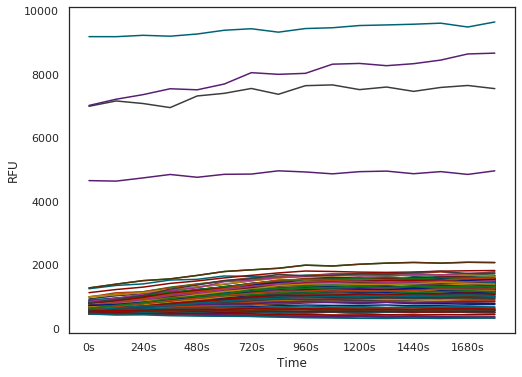

In [9]:
data.set_index('Well').transpose().plot(legend = False, figsize = (8, 6))
plt.ylabel('RFU')
plt.xlabel('Time')
plt.show()

__There are four compounds which start the assay with high fluorescence. Most probably, these are compounds with some flourescence properties. To better visualize the rises in RFU, we will plot first 10 rows:__ 

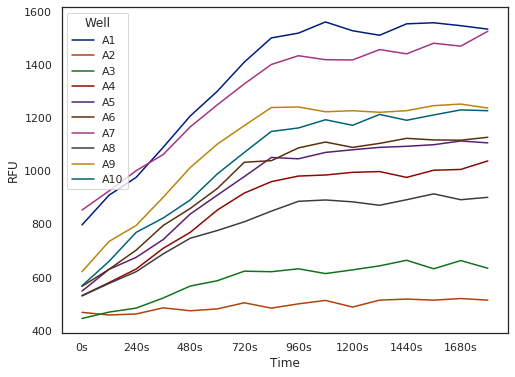

In [10]:
data[0:10].set_index('Well').transpose().plot(figsize = (8, 6))
plt.ylabel('RFU')
plt.xlabel('Time')
plt.show()

### Define Time Window and calculate Slopes
<a id="get_slopes"></a>

* __From the graph we can see that we can calculate the slopes from the first 600 seconds of the asssay.__   
* __We will copy the first 6 timepoints (600 seconds) to the separate dataframe and calculate the slopes.__
* __Next, we have to divide the slopes by 600, to get the slopes in RFU/sec units.__

#### Copy the first 6 timepoints (600 seconds) to the separate dataframe 

In [11]:
slope_600 = data.set_index('Well').transpose()[0:6].reset_index(drop = True)
slope_600.rename(columns = {'Well' : 'Time'}, inplace = True)
slope_600

Well,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24
0,798,469,446,532,549,567,854,531,622,569,...,590,702,707,578,687,573,724,629,622,547
1,910,459,470,581,631,631,926,578,736,661,...,611,785,795,630,763,641,757,684,730,564
2,977,463,485,632,676,703,1002,622,796,770,...,672,871,894,654,858,710,826,786,811,583
3,1090,486,523,710,743,796,1063,689,902,824,...,716,1015,1041,737,951,715,885,879,950,597
4,1208,475,568,770,839,860,1167,748,1014,892,...,749,1032,1114,792,1065,791,1013,950,1010,601
5,1301,482,588,854,910,935,1250,777,1102,990,...,773,1191,1225,816,1165,862,1044,1038,1067,608


#### Calculate slopes and create results dataframe

In [12]:
slopes = slope_600.apply(lambda x: np.polyfit(slope_600.index, x, 1)[0])/600
results = pd.DataFrame({'Well': data.Well.values, 'slope': slopes.values})
display(results.head())

,Well,slope
0,A1,0.167714
1,A2,0.006476
2,A3,0.049619
3,A4,0.107381
4,A5,0.118857


#### Plot slopes in the first 10 wells

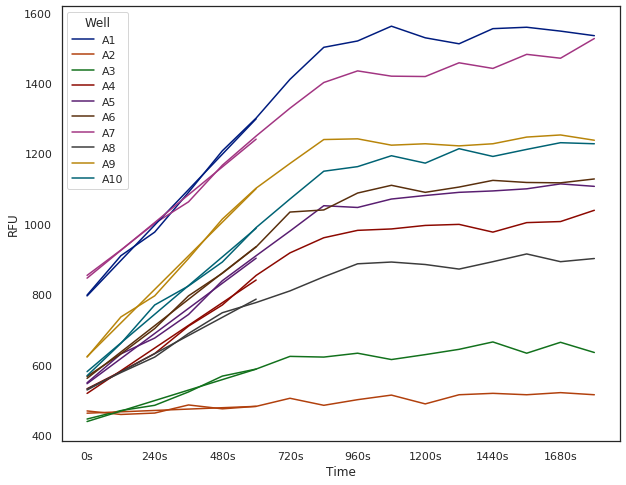

In [13]:
data[0:10].set_index('Well').transpose().plot(figsize = (10, 8))
for i in slope_600.columns[0:10]:
    plt.plot(np.polyval(np.polyfit(slope_600.index, slope_600[i], 1), slope_600.index)) 

plt.ylabel('RFU')
plt.xlabel('Time')
plt.show()

### Add Plate Layout
<a id="layout"></a> 

<div align="justify"> When we plan the experiment, we usually draw the treatments layout in the format of a plate - 16x24 table for the 384 well plate. Similarly, we will prepare input tables in an excel file, where each sheet will represent some qualitiy of the wells. So the first sheet will be about well names, and the second one is about status - it can be 'Sample', 'Positive', or 'Negative' controls. We will write function which takes each sheet and reshapes it so it can be added as a column to the layout dataframe. We can add as many sheets as we need, including treatments, concentrations, cell density, ect.</div>

<img style="float: left; margin-right:700px"  width="850" src="hts_images/layout.png" > 

<div align="justify"> Next, we need to import compound ids from chemical library. There are two options. We can fill compound ids manually in the layout excel, or we can give to the function the plate name from defined library. In this module, we will use example_chemicals.csv file located in Resources. The name of the library is 'example_library', it contains random compounds divided into 3 plates: 'ex_plate1', 'ex_plate2', and 'ex_plate3'
For example, to load compounds from plate 3 of the library, we will pass to the function chem_path = '..//resources//compounds//example_chemicals.csv, and chem_plate = 'ex_plate3'.</div>
   
    
<img style="float: left; margin-right:700px"  width="750" src= "hts_images/chemlib.png" >

<div class="alert alert-block alert-info"><b>Tip:</b> In case you need to exclude some wells from the analysis, set the well status as 'Reference', and such wells will be excluded from the analysis .</div>

#### Writing function to add layout
__This function takes as a input the data, path to the layout excel file, and optionally the  path to chemical library path and plate name, and returns updated DataFrame.__

In [14]:
def add_layout(data, layout_path, chem_path = None, chem_plate = None): 
    layout = pd.DataFrame()
    
    for sheet in pd.ExcelFile(layout_path).sheet_names:   # create columns from excel file
        layout[sheet] = np.asarray(pd.ExcelFile(layout_path).parse(sheet)).reshape(-1)
        print('added ', sheet)
        
    if chem_path and chem_plate:   # add compounds
        
        compounds = pd.read_csv(chem_path, low_memory = False)
        layout = pd.merge(layout, compounds[compounds.Plate == chem_plate], how = 'left', on = 'Well')
        print('added Compounds: ',chem_plate,'\n') 
    else:
        print('Chemical library not requested')
        
    output = pd.merge(data, layout, how = 'left', on = 'Well')   
    return output

#### Add layout

In [15]:
layout_path = 'hts_data//enzyme_kinetics_layout.xlsx'
chem_path = 'hts_data//compounds//example_chemicals.csv'
chem_plate = 'ex_plate1'

results = add_layout(results, layout_path, chem_path  = chem_path , chem_plate = chem_plate).drop_duplicates(subset = ['Plate', 'Well'])
print(results.shape)
display(results.head())

added  Well
added  Status
added Compounds:  ex_plate1 

(384, 9)


,Well,slope,Status,Plate,Compound_id,lib_name,SMILES,Compound Name,SecName
0,A1,0.167714,Negative,NaN,NaN,NaN,NaN,NaN,NaN
1,A2,0.006476,Positive,NaN,NaN,NaN,NaN,NaN,NaN
2,A3,0.049619,Sample,ex_plate1,Compound_0001,example_library,Cc1nn(C)c2nc(C(C)C)cc(C(=O)N3CCN(C(=O)C4CC4)CC...,NaN,NaN
3,A4,0.107381,Sample,ex_plate1,Compound_0002,example_library,CCOC(=O)c1c(S(=O)(=O)N2CCOCC2)c(-c2ccccc2)n(-c...,NaN,NaN
4,A5,0.118857,Sample,ex_plate1,Compound_0003,example_library,Cn1nc(-c2ccc(C=C(C#N)S(=O)(=O)c3ccc(C(F)(F)F)c...,NaN,NaN


### Running Quality Control 
<a id="qc"></a> 

### Normalize Data
<a id="norm"></a> 

We will write a function which takes an input dataframe and the name of the feature to normalize (in our case it is slope), and returns a dataframe with calculated z-scores in a new column 'slope_norm'.

In [16]:
# function

def normalize_z(df, feature):
    mean = df[df['Status'] == 'Sample'][[feature]].mean()
    std = df[df['Status'] == 'Sample'][[feature]].std()  
    df[feature + '_norm'] =  df[feature].apply(lambda x:(x - mean)/std)
    return(df)

#### Calculate z-score

In [17]:
results = normalize_z(results, 'slope')
display(results.head(3))

,Well,slope,Status,Plate,Compound_id,lib_name,SMILES,Compound Name,SecName,slope_norm
0,A1,0.167714,Negative,NaN,NaN,NaN,NaN,NaN,NaN,0.765387
1,A2,0.006476,Positive,NaN,NaN,NaN,NaN,NaN,NaN,-3.280039
2,A3,0.049619,Sample,ex_plate1,Compound_0001,example_library,Cc1nn(C)c2nc(C(C)C)cc(C(=O)N3CCN(C(=O)C4CC4)CC...,NaN,NaN,-2.197595


### Create heatmap
<a id="heatmap"></a>
Plate  visualization is an effective technique  for  uncovering  undesirable patterns that might indicate technical problems. To build heatmap, we need first reorder wells as humans do (A1, A2, A3...), since by default the wells are ordered as A1, A10, A11....A2...

We will write function which will help us to reorder wells, and then we just reshape the z-scores (slope_norm) as 16x24 matrix.

#### Reorder wells

In [18]:
# function

def order_wells(x): 
    '''Orders wells in the table in row by row order. Takes list of Well values and returns reordered list'''
    convert = lambda text: int(text) if text.isdigit() else text 
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ]
    return sorted(x, key = alphanum_key)

In [19]:
results = results.set_index('Well', drop = False)
ordered_data =  pd.DataFrame()

for well in order_wells(results.Well):
        ordered_data = ordered_data.append(results.loc[well,:])

print(ordered_data.Well.values [0:26])

['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12' 'A13'
 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A20' 'A21' 'A22' 'A23' 'A24' 'B1'
 'B2']


__Now we can reshare the slope_norm values by 16x24 for 384 well plate:__

In [20]:
plate_view = ordered_data['slope_norm'].values.reshape(16,24)

__Plot heatmap and save figure in the output folder:__

In [21]:
print(list(range(1, 25)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


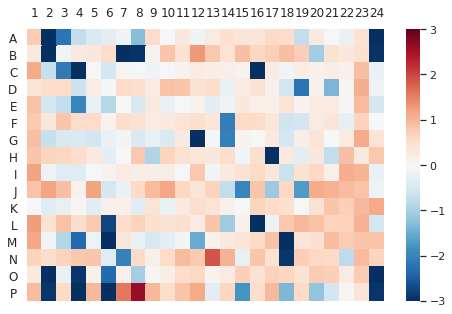

In [22]:
plt.figure(figsize=(8, 5))
yticks = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P']
xticks = list(range(1, 25))
ax = sns.heatmap(plate_view, vmin = -3, vmax = 3, center = 0, yticklabels = yticks, xticklabels = xticks, cmap = 'RdBu_r')
plt.tick_params(axis = 'both', which = 'major', labelsize = 12, labelbottom = False, bottom = False,  
                top = False, labeltop = True)
plt.yticks(rotation=0)
plt.savefig(path + '//' + 'enzyme_heatmap.png', bbox_inches = 'tight', dpi = 600)
plt.show()

### Calculate Statistics
<a id="stats"></a>
__Writing function for statistics__

In [23]:
# function

def sum_statistics(df, feature):
    st = None
    if 'Positive' in df['Status'].unique() and 'Negative' in df['Status'].unique():
        df = df[df.Status != 'Reference'][[feature, 'Status']]
        st = df.groupby(['Status']).agg([np.size, np.mean, np.std, np.var])
        st.columns = st.columns.droplevel()
        st['Z_score'] = 1 - 3*(st.at['Positive','std'] + st.at['Negative','std'])/abs(st.at['Positive','mean'] - st.at['Negative','mean'])  
        st['SB'] = st.at['Positive','mean']/st.at['Negative','mean']
        st['Feature'] = feature
        st = st.reset_index()[['Feature', 'Status', 'size', 'mean', 'std', 'var', 'Z_score', 'SB']]
    else:
        print('Failed calculate Z score. Positive or Negative control is missing.')
        pass
    return st

In [24]:
stats = sum_statistics(results, 'slope_norm')
stats.to_csv(path + '//sum_statistics.csv', index = False) # save to output folder
display(stats)

,Feature,Status,size,mean,std,var,Z_score,SB
0,slope_norm,Negative,32.0,7.848019e-01,0.315513,0.099549,0.527222,-4.105043
1,slope_norm,Positive,8.0,-3.221645e+00,0.315873,0.099776,0.527222,-4.105043
2,slope_norm,Sample,320.0,-2.605555e-16,1.000000,1.000000,0.527222,-4.105043


#### In g-score histogram, we will also plot 99% confidence intervals to visualize out theshold

In [25]:
# function

def histogram_feature(path, df, y, save_as):
    sns.distplot(df[y].values)
    plt.plot([-2, -2], [0, 0.5], color = 'r', linestyle = '--', lw = 1.7)
    plt.plot([2, 2], [0, 0.5], color = 'r', linestyle = '--', lw = 1.7)
    plt.savefig(path + '//' + save_as, bbox_inches = 'tight', dpi = 600)
    plt.show()

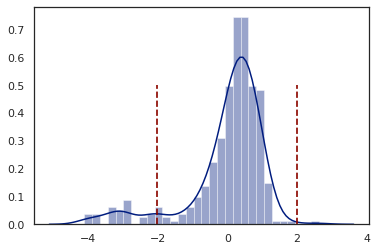

In [26]:
results = results[results.Status != 'Reference']
histogram_feature(df = results, y = 'slope_norm', save_as = 'histogram.png', path = path)

#### From histogram, we can decide about threshold.
#### We can decide that in our case threshold = -2 (which corresponds to 0.05 p-value) is good enough.

In [27]:
threshold = -2

### Select Hits
<a id="hits"></a>

* First we will copy values from the 'Status' column to the new 'Results' column
* If in some sample the 'slope_norm' is lower than the defined threshold, we will change it's 'Result' value to 'Hit'

In [28]:
results['Result'] = results['Status'].values
results['Result'] = np.where((results['slope_norm'] <= threshold) & (results['Result'] =='Sample'), 'Hit', results['Result']) 
display(results.sort_values(['slope_norm']).head())

,Well,slope,Status,Plate,Compound_id,lib_name,SMILES,Compound Name,SecName,slope_norm,Result
Well,,,,,,,,,,,
G12,G12,-0.025952,Sample,ex_plate1,Compound_0129,example_library,CCN(Cc1ccc2c(c1)OCCO2)S(=O)(=O)c1c(C)noc1C,NaN,NaN,-4.093664,Hit
L16,L16,-0.023381,Sample,ex_plate1,Compound_0233,example_library,O=C(C=Cc1ccco1)Nc1ccccc1C(=O)Nc1ccc2c(c1)OCO2,NaN,NaN,-4.029148,Hit
M6,M6,-0.021714,Sample,ex_plate1,Compound_0243,example_library,Cc1nnc(NCCc2c[nH]c3ccccc23)c(C#N)c1C,NaN,NaN,-3.987331,Hit
H17,H17,-0.015381,Sample,ex_plate1,Compound_0154,example_library,COc1ccc(CCNC(=O)c2ccccc2NC(=O)CN2CCN(C(C)=O)CC...,NaN,NaN,-3.828429,Hit
B2,B2,-0.015381,Positive,NaN,NaN,NaN,NaN,NaN,NaN,-3.828429,Positive


#### Save results to csv

In [29]:
results.to_csv(path +'//enzyme_kinetics_results.csv', index = False)

### Visualization
<a id="viso"></a>

#### Defining palette

As we like to preserve the colors of Samples, Positive and Negative control and Hits categoties, we will create a custom palette and define the hue order, and we will use these settings it in the future work.


In [25]:
palette = {'Sample':'Navy','Negative':'Darkred','Positive':'Darkgreen', 'Hit': 'Orange'}

hue_order = ['Sample', 'Negative', 'Positive', 'Hit']

#### Plot Results
<a id="point"></a>

To plot the results, we will first prepare the data:

* drop all 'Reference' wells
* sort values by status, to arrange all positive and negative controls close in location

In [26]:
plot_data = results[results.Status != 'Reference'].sort_values('Status')

In [27]:
# function

def pointplot_plate(x, y, df, hue, hue_order, threshold, ylabel, palette,  save_as, path):
    g = sns.catplot(x = x, y = y, hue = hue, data = df, height = 6, aspect = 2.5, margin_titles = False,
                   palette = palette, hue_order = hue_order)
    g.set_xticklabels([])
    plt.ylabel(ylabel)
    for t in threshold:
        plt.plot([0, df.shape[0]], [threshold, threshold],'r-')
    g.despine()
    g.savefig(path +'//' + save_as, bbox_inches = 'tight', dpi = 600)
    plt.show()
    plt.close()

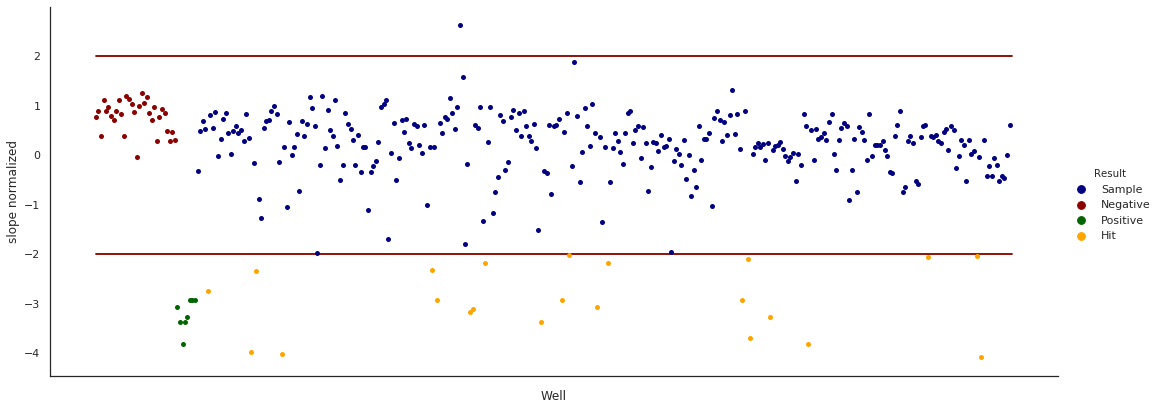

In [28]:
pointplot_plate(x = 'Well', y = 'slope_norm', df = plot_data, hue = 'Result', hue_order = hue_order,
                     threshold = [-2, 2], ylabel = 'slope normalized', palette = palette,  save_as = 'pointplot.png',
                           path = path)
    

#### Explore Hit molecules
<a id="molv"></a>

In [30]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw,PyMol, rdFMCS
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit import rdBase
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem.Scaffolds import MurckoScaffold
from rdkit.Chem import rdFMCS
from rdkit.Chem import PandasTools

RDKit WARNING: [13:52:28] Enabling RDKit 2019.09.3 jupyter extensions


In [31]:
hits = results[results.Result == 'Hit'].sort_values('slope_norm')
print(hits.shape)

(22, 11)


Compound_0129
slope_norm =  -4.093664058981155
CCN(Cc1ccc2c(c1)OCCO2)S(=O)(=O)c1c(C)noc1C


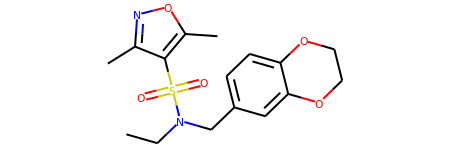

Compound_0233
slope_norm =  -4.029147519143871
O=C(C=Cc1ccco1)Nc1ccccc1C(=O)Nc1ccc2c(c1)OCO2


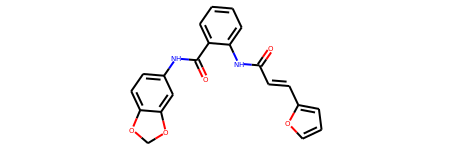

Compound_0243
slope_norm =  -3.987331243323407
Cc1nnc(NCCc2c[nH]c3ccccc23)c(C#N)c1C


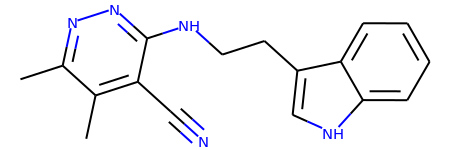

Compound_0154
slope_norm =  -3.8284293952056454
COc1ccc(CCNC(=O)c2ccccc2NC(=O)CN2CCN(C(C)=O)CC2)cc1


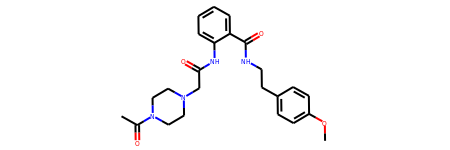

Compound_0041
slope_norm =  -3.7149280751215303
CC(C)N(Cc1ccccc1)S(=O)(=O)c1ccc2c(c1)CCO2


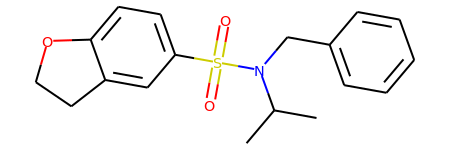

Compound_0255
slope_norm =  -3.3911506251973713
Cn1ncc2c(=O)n(CC(=O)Nc3ncc(Cc4ccc(F)cc4)s3)cnc21


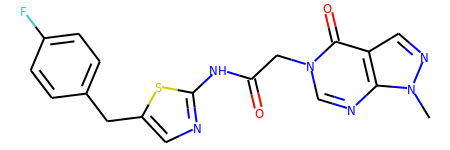

Compound_0053
slope_norm =  -3.2800388065887116
CC1c2cccn2CCN1S(=O)(=O)c1ccc(F)cc1F


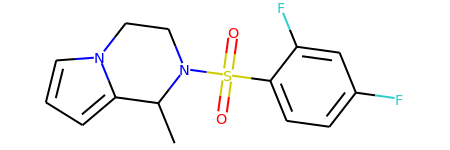

Compound_0303
slope_norm =  -3.182069246095052
CCOC(=O)c1cc(CO)cc(C(=O)OCC)c1


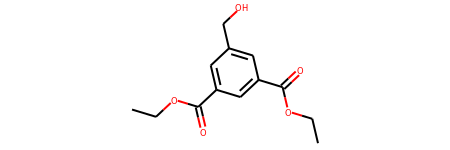

Compound_0301
slope_norm =  -3.1163579555200394
CC(C)CCNc1ccc2nnnn2n1


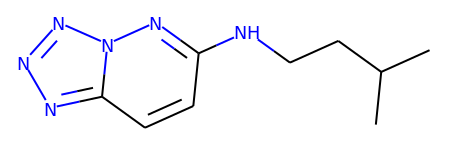

Compound_0025
slope_norm =  -3.0840996856013954
CC1CC(=O)NN=C1c1ccc(NN=C(C#N)C#N)cc1


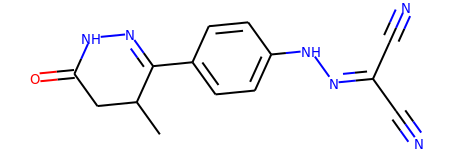

Compound_0026
slope_norm =  -2.9407295970740917
O=C(Sc1cccs1)c1cncc(C#Cc2ccccc2)c1


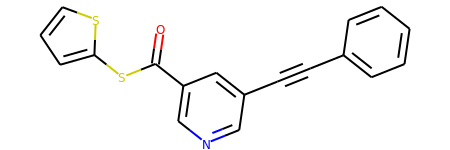

Compound_0281
slope_norm =  -2.9287820896968175
Cn1nc(-c2ccc(S(=O)(=O)Oc3cccc([N+](=O)[O-])c3)s2)cc1C(F)(F)F


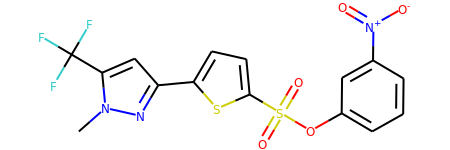

Compound_0275
slope_norm =  -2.9287820896968166
CC(OC1OCCN(Cc2nc(=O)[nH][nH]2)C1c1ccc(F)cc1)c1cc(C(F)(F)F)cc(C(F)(F)F)c1


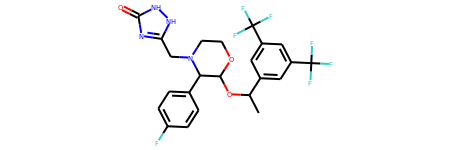

Compound_0223
slope_norm =  -2.763906487890421
CC(=Cc1ccccn1)C(=O)c1c(C)c(C)c(C)c(C)c1C


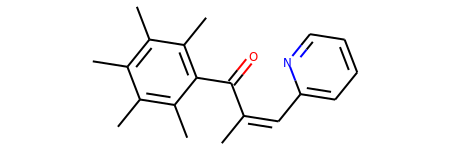

Compound_0241
slope_norm =  -2.3553017355876045
CC(C)(C)c1ccc(NC(=O)N2CCCN(c3nccc(C(F)(F)F)n3)CC2)cc1


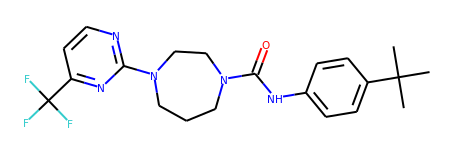

Compound_0283
slope_norm =  -2.33857522525942
COc1cc(OC)nc(N)n1


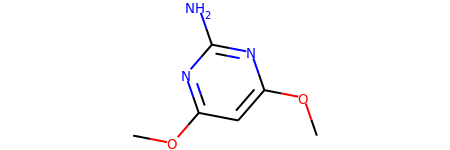

Compound_0001
slope_norm =  -2.1975946382075717
Cc1nn(C)c2nc(C(C)C)cc(C(=O)N3CCN(C(=O)C4CC4)CC3)c12


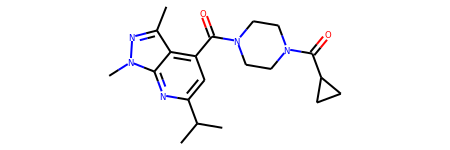

Compound_0076
slope_norm =  -2.1868418815680246
Cc1ccc(-n2nnnc2SCC(=O)N2CCOCC2)c(C)c1


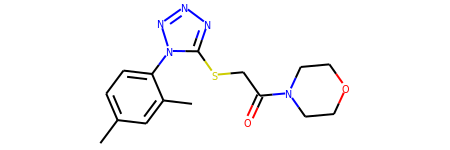

Compound_0040
slope_norm =  -2.118741089517554
CNC(C)C(=O)NC(C(=O)N1CCCC1C(=O)NC(C(=O)NCCCCCCNC(=O)C(NC(=O)C1CCCN1C(=O)C(NC(=O)C(C)NC)C1CCCCC1)C(c1ccccc1)c1ccccc1)C(c1ccccc1)c1ccccc1)C1CCCCC1


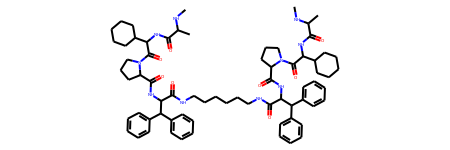

Compound_0111
slope_norm =  -2.063782555582085
Cn1cnc([N+](=O)[O-])c1NC1Cc2ccccc2C1


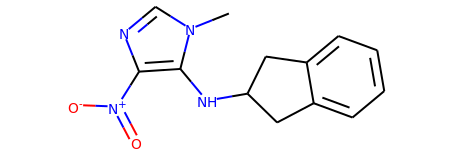

Compound_0131
slope_norm =  -2.0530297989425392
CCc1nnc(Cn2cnc3ccccc3c2=O)o1


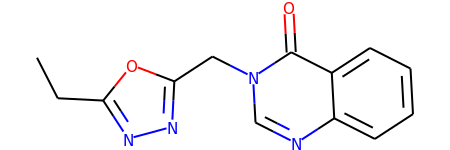

Compound_0264
slope_norm =  -2.0279400334502617
O=C(O)c1ccc2ccccc2c1Br


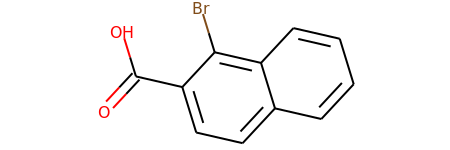

In [32]:
# DRAW HIT COMPOUNDS
for index,row in hits.iterrows():
    smile = row['SMILES']
    print(row['Compound_id'])
    print('slope_norm = ', row['slope_norm'])
    print(row['SMILES'])
    mol = Chem.MolFromSmiles(smile)
    template = Chem.MolFromSmiles(smile)
    AllChem.Compute2DCoords(template)
    AllChem.GenerateDepictionMatching2DStructure(mol,template)
    Draw.MolToFile(mol, path + '//' + row['Compound_id'] + '.png', size=(600, 600))
    display(mol)

#### Get bioactivity data for Compound_0233
<a id="activity"></a>

In [32]:
# import compound by smiles
import pubchempy as pcp
#c1 = pcp.get_compounds('O=C(C=Cc1ccco1)Nc1ccccc1C(=O)Nc1ccc2c(c1)OCO2', 'smiles')
c1 = pcp.get_compounds('CCN(Cc1ccc2c(c1)OCCO2)S(=O)(=O)c1c(C)noc1C', 'smiles')
c1[0].to_dict(properties=['cid', 'rotatable_bond_count', 'tpsa', 'xlogp', ])

{'cid': 9116910, 'rotatable_bond_count': 5, 'tpsa': 90.2, 'xlogp': 1.9}

In [33]:
print('CID ', c1[0].cid)

# import bioactivity data and save in the output folder
import wget 
try:
    c1_activity = wget.download('https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/cid/' + str(c1[0].cid) + '/assaysummary/CSV', path + '//enzymatic_pubchem.csv')
except Exception as e:
    print(e)

CID  9116910


In [34]:
# read activity data
c1_activity = pd.read_csv(path + '//enzymatic_pubchem.csv').sort_values(['Bioactivity Outcome'])
display(c1_activity[[ 'Assay Name', 'Bioactivity Outcome', 'AID', 'CID']] )


,Assay Name,Bioactivity Outcome,AID,CID
0,Cell-based high-throughput assay to identify s...,Inactive,1347385,9116910


#### We can see that our second most inhibiting compound was involved in a variety of assays, but not yet have any reported biological activity. 

#### Create ppt report and clean output folder

In [35]:
report = create_presentation(path).save(path +'//' + 'enzymatic_report.pptx')

In [36]:
# Clean pictures from output folder
for f in os.listdir(path):
    if '.png' in f:
        os.remove(path +'//' + f)

### Conclusions
<a id="conclusions"></a>

We learned how to read heatmap and find systematic errors and outliers, extract hits and visualize the results.Basic QC and statistic principles...

We wrote a number of functions:
* order_wells   
* hts_heatmap   
* sum_statistics   
* normalize_z   
* histogram_feature  
* plot_status_plate  
* plot_values_plate  


All those functions are available from simplydrug module